In [1]:
%matplotlib inline

from boututils.datafile import DataFile
from boutdata.collect import collect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, pathlib
import platform
import traceback
import xarray
import xbout
import scipy
import re

onedrive_path = onedrive_path = str(os.getcwd()).split("OneDrive")[0] + "OneDrive"
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\sdtools"))
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\soledge"))
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages"))

from hermes3.utils import *

import gridtools.solps_python_scripts.setup
from gridtools.solps_python_scripts.utilities.last10s       import read_last10s

from hermes3.fluxes import *
from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *

from code_comparison.code_comparison import *
from code_comparison.viewer_2d import *


%load_ext autoreload
%autoreload 2

plt.close("all")
%matplotlib inline

print("Done")


st40_phys_viewer can not be loaded from outside Tokamak Energy!

Done


# Overview

### I reran the final two cases without AFN (frec and pump) with the newest version of fast recycling where I fixed the recycling energy source to come from the sheath heat sink and implemented it in the wall and PFR.

# Hermes IO

In [2]:
casestore = dict()

In [3]:
   
db = CaseDB()
toload = [
    dict(name="nofrec", id="d19c-also_nofrec"),
    dict(name="pump", id = "d19-noafn_all"),
    dict(name="frec", id = "d19b-noafn_nopump"),
    dict(name="pump_new", id = "d19aeb-noafn_all_newfrec_retry"),
    dict(name="frec_new", id = "d19bb-new_frec"),
    dict(name="frec_tune_crash", id = "d19aec_crash"),
    dict(name="frec_tune", id = "d19aec-also_tune_frec"),
    # dict(name="afn_unch", id = "d20bd-allbc_afnv2_mfp10_ntune"),
    # dict(name="afn_new", id = "d21-allbc_afn_vb1_newfrec"),
    # dict(name="afn_new_cond0.1", id = "d21a-cond_alpha_0.1")
]
casestore = {}
for case in toload:
    casestore[case["name"]] = db.load_case_2D(case["id"], use_squash = True, verbose = True)

- Reading case d19-noafn_all
-----------------------
- Looking for squash file
- Squash file found. squash date 09/25/2023, 15:31:08, dmp file date 09/18/2023, 11:16:19

- Reading case d19b-noafn_nopump
-----------------------
- Looking for squash file
- Squash file found. squash date 09/25/2023, 15:36:45, dmp file date 09/16/2023, 17:13:41

- Reading case d19aeb-noafn_all_newfrec_retry
-----------------------
- Looking for squash file
- Squash file found. squash date 10/08/2023, 13:37:09, dmp file date 10/08/2023, 11:19:05

- Reading case d19bb-new_frec
-----------------------
- Looking for squash file
- Squash file found. squash date 10/08/2023, 13:42:02, dmp file date 10/08/2023, 11:56:37

- Reading case d19aec_crash
-----------------------
- Looking for squash file
- Squash file found. squash date 10/10/2023, 09:31:19, dmp file date 10/10/2023, 00:22:40

- Reading case d19aec-also_tune_frec
-----------------------
- Looking for squash file
- Squash file found. squash date 10/10/202

In [4]:
plt.close("all")
%matplotlib inline

## Read Hermes data

In [5]:
hr = dict()
for hermes_case in casestore.keys(): 
    print(hermes_case)
    hr[hermes_case] = Hermesdata()
    hr[hermes_case].read_case(casestore[hermes_case].ds.isel(t=-1, x = slice(2,-2)))

pump
frec
pump_new
frec_new
frec_tune_crash
frec_tune


# Read SOLEDGE CSV data

In [6]:
soledgecases = {
    "tightwall_1e19" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\soledge_cases\ST40_wallMike_bra_nocore_D_1e19"), # Hermes-3 like wall
    "tightwall_2e19" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\soledge_cases\ST40_wallMike_bra_nocore_D_2e19"), # Hermes-3 like wall
    "widewall_2e19_5m" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\soledge_cases\ST40_wallStd_bra_nocore_D_2e19_5M"),
    "tightwall_3e19" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\soledge_cases\ST40_wallMike_bra_nocore_D_3e19"), # Hermes-3 like wall
    "widewall_1e19" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\soledge_cases\ST40_wallStd_bra_nocore_D_1e19"), 
    "widewall_2e19" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\soledge_cases\ST40_wallStd_bra_nocore_D_2e19"), 
    "widewall_3e19" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\soledge_cases\ST40_wallStd_bra_nocore_D_3e19"), 
}

sl = dict()

for name in soledgecases:
    path = soledgecases[name]
    sl[name] = SOLEDGEdata(path = path)
    sl[name].read_csv(os.path.join(path, "omp_plasma.csv"), mode = "plot1d_omp")
    sl[name].read_csv(os.path.join(path, "omp_neutrals.csv"), mode = "plot1d_omp")
    sl[name].read_csv(os.path.join(path, "imp_plasma.csv"), mode = "plot1d_imp")
    sl[name].read_csv(os.path.join(path, "imp_neutrals.csv"), mode = "plot1d_imp")
    sl[name].read_csv(os.path.join(path, "wall_ntmpi_plasma.csv"), mode = "wall_ntmpi")



c:\Users\mikek\OneDrive\Project\python-packages\soledge\routines\h5_routines.py:65: FutureWarning: In the future `np.str` will be defined as the corresponding NumPy scalar.
  Data = Data.astype(np.str)
c:\Users\mikek\OneDrive\Project\python-packages\soledge\routines\h5_routines.py:65: FutureWarning: In the future `np.str` will be defined as the corresponding NumPy scalar.
  Data = Data.astype(np.str)
c:\Users\mikek\OneDrive\Project\python-packages\soledge\routines\h5_routines.py:65: FutureWarning: In the future `np.str` will be defined as the corresponding NumPy scalar.
  Data = Data.astype(np.str)
c:\Users\mikek\OneDrive\Project\python-packages\soledge\routines\h5_routines.py:65: FutureWarning: In the future `np.str` will be defined as the corresponding NumPy scalar.
  Data = Data.astype(np.str)
c:\Users\mikek\OneDrive\Project\python-packages\soledge\routines\h5_routines.py:65: FutureWarning: In the future `np.str` will be defined as the corresponding NumPy scalar.
  Data = Data.astyp

## Read SOLPS

In [7]:
solpscases = {
    "base" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5"),
    "noiz_core" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16"),
    "gammai_2.5" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16.GAMMAI=2.5E+00"),
    "dpuff_1e22" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16.D2PUFF=1.0E+22"),
    "dpuff_5e21" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16.D2PUFF=5.0E+21"),
    "no_fast_reflec" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16.Pf=0"),
    "nsep_2e19" : os.path.join(onedrive_path,r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE_core_extent\.core_extent.b2tqca_phm0=0.nesepm=2E+19"),
    "nsep_3e19" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE_core_extent\.core_extent.b2tqca_phm0=0.nesepm=3E+19"),
    "narrow_core" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE_core_extent\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16.core_extent"),
    "no_visc" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE_core_extent\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16.core_extent.b2tqca_phm0=0"),
    "16x_mc" : os.path.join(onedrive_path, r"C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE_core_extent\HERMES_SOLEDGE.S33600_Tamb_case.xxx.BCCON=16.core_extent.MC.histories.x16-ish.NOT.converged"),
}

sp = dict()

for name in solpscases:
    sp[name] = SOLPSdata()
    sp[name].read_last10s(solpscases[name])

c:\Users\mikek\OneDrive\Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5\last10s.pkl loaded
c:\Users\mikek\OneDrive\Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16\last10s.pkl loaded
c:\Users\mikek\OneDrive\Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16.GAMMAI=2.5E+00\last10s.pkl loaded
c:\Users\mikek\OneDrive\Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16.D2PUFF=1.0E+22\last10s.pkl loaded
c:\Users\mikek\OneDrive\Project\collab\tech\co

In [8]:
for name in casestore:

    ds = casestore[name].ds
    ds = calculate_radial_fluxes(ds)



# No AFN cases
- Frec and pump
- Neutral temperature increases at target
- With pump enabled the increased temp must increase Vth and therefore pump rate
- This causes large drop in density as well as target ion temp increase which then feeds back upstrem

## No pump

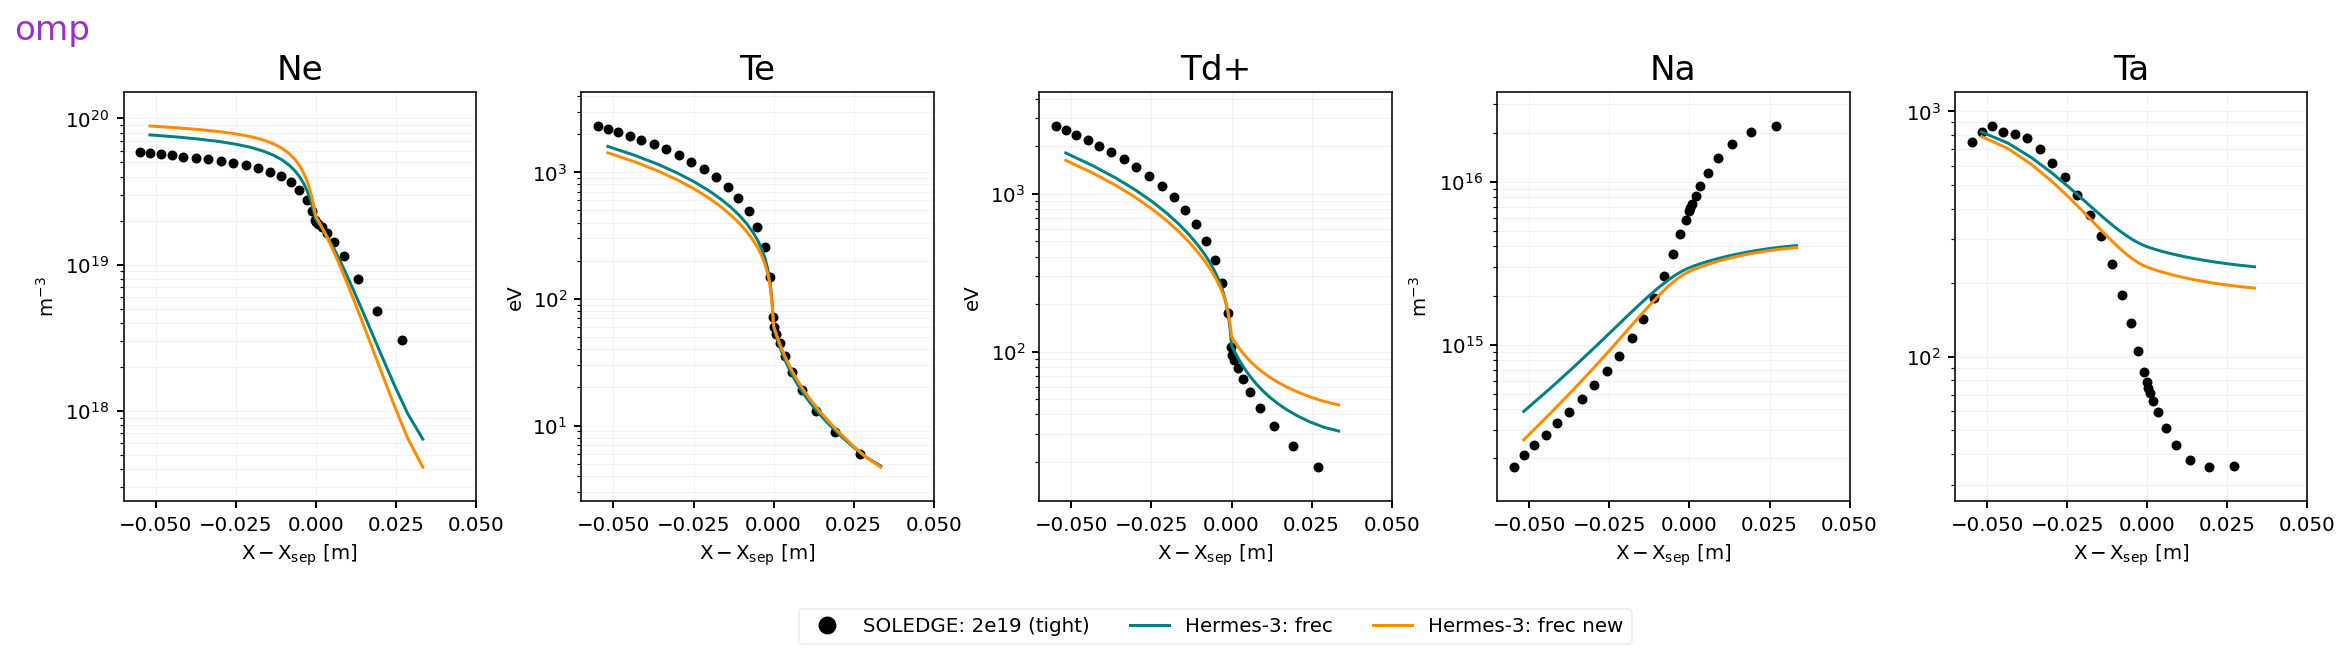

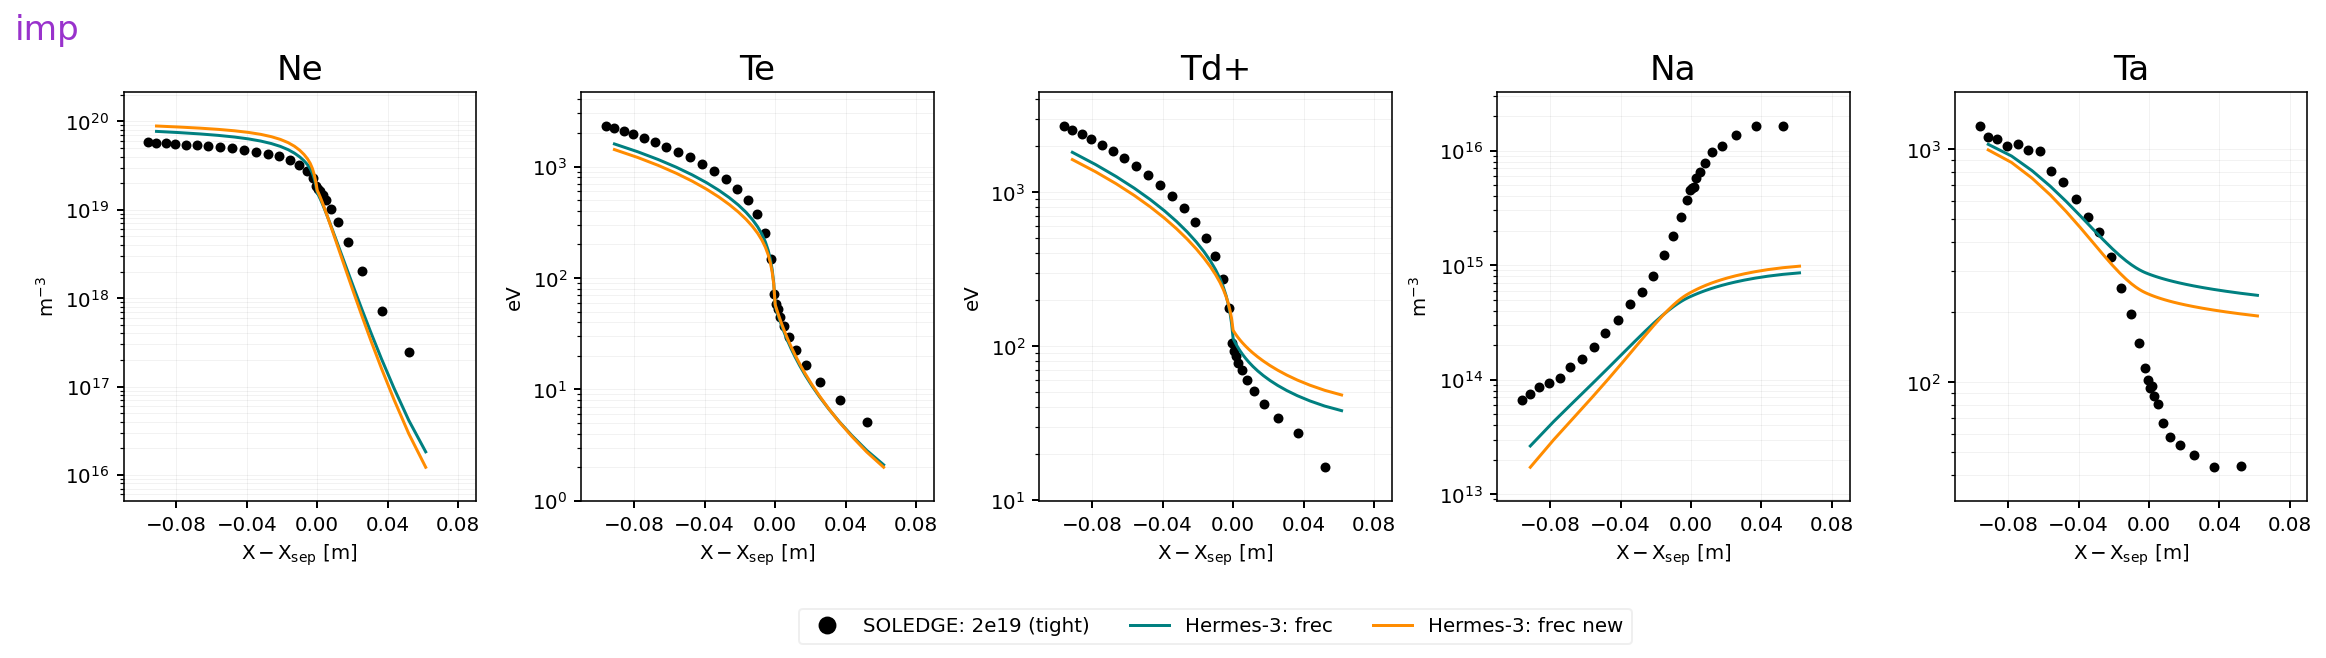

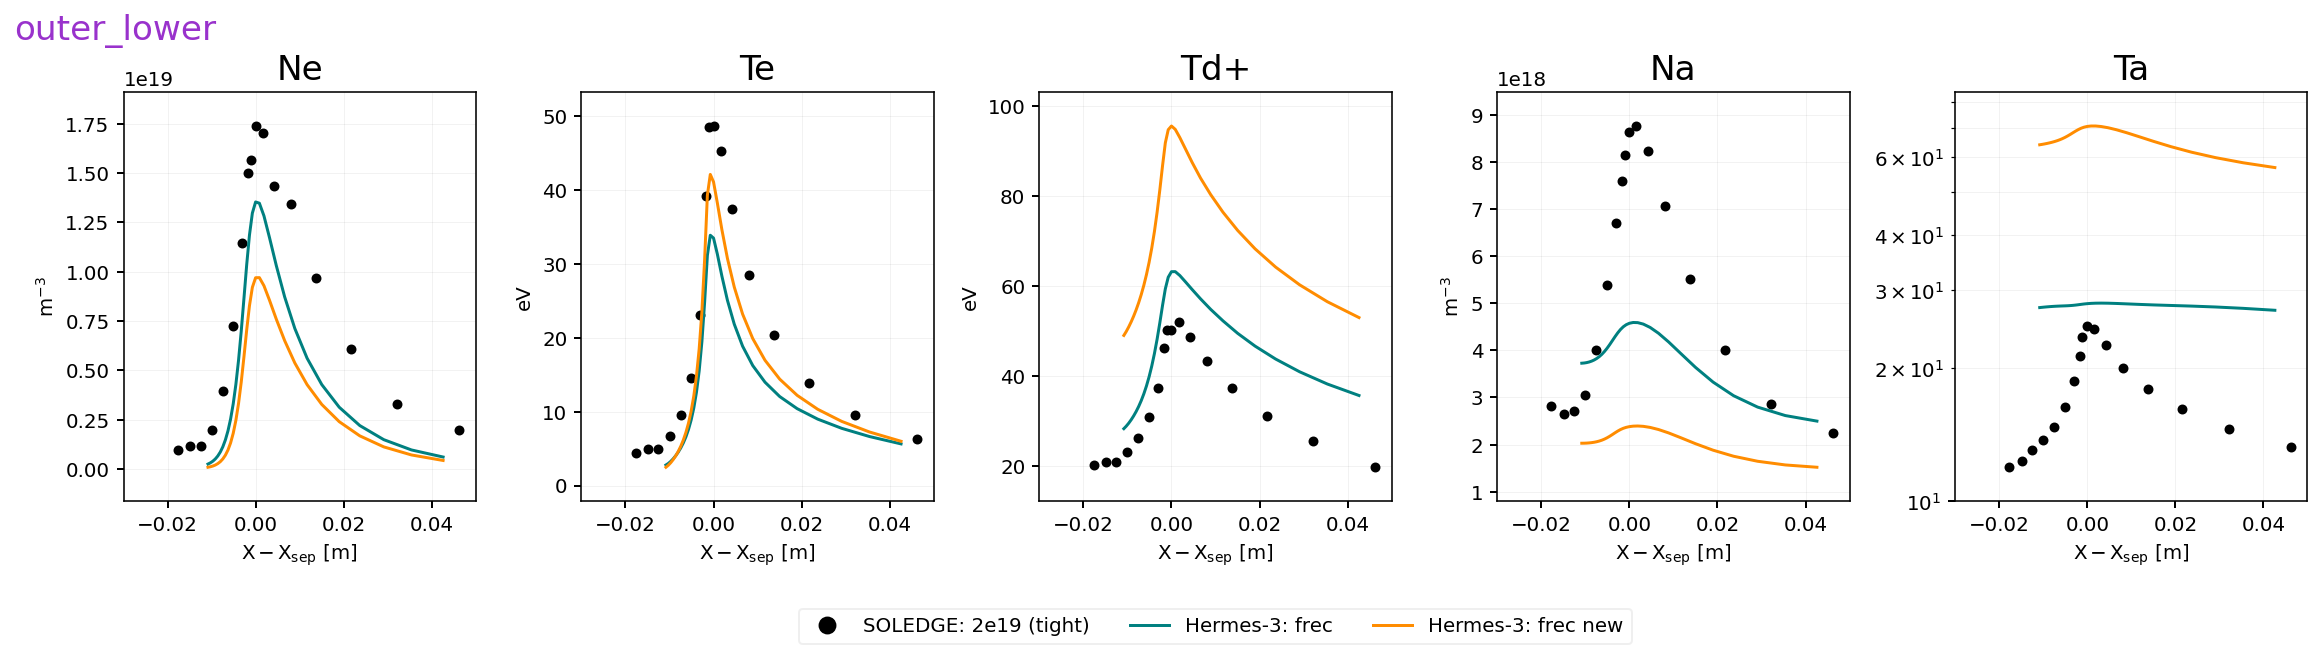

In [10]:

plt.close("all")
lineplot_compare(
    cases = { 


    "SOLEDGE: 2e19 (tight)" : dict(data=sl["tightwall_2e19"], color="black"),
    # "SOLPS: 2e19 (tight)" : dict(data=sp["nsep_3e19"], color="red"),
    
    "Hermes-3: frec": dict(data=hr["frec"], color = "teal"),
    "Hermes-3: frec new" : dict(data=hr['frec_new'], color = "darkorange"),
    # "Hermes-3: pump" : dict(data=hr['pump'], color = "teal"),
    # "Hermes-3: pump new" : dict(data=hr['pump_new'], color = "darkorange"),

    },
    regions = ["omp", "imp", "outer_lower"], 
    # regions = ["outer_lower"],
    # params = ["Ne", "Te"],
    params = ["Ne", "Te", "Td+", "Na", "Ta"],
    # params = ["Pe", "Pd+", "Pa"],
    mode = "log",
    dpi = 130,
    lw = 2
)

## Pump

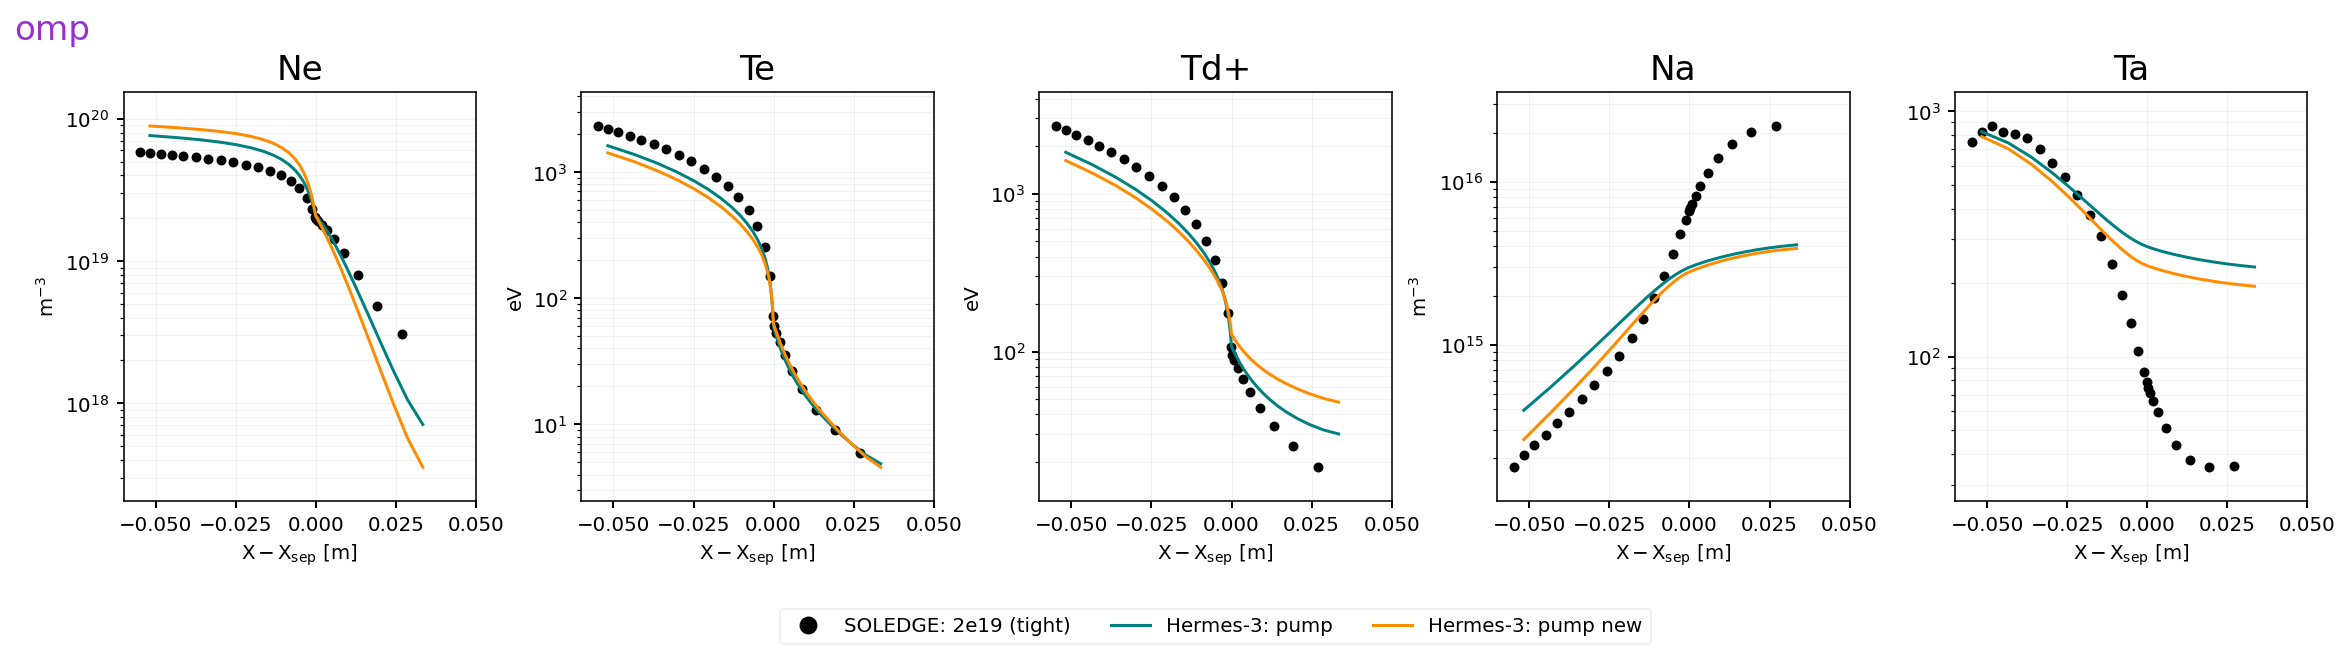

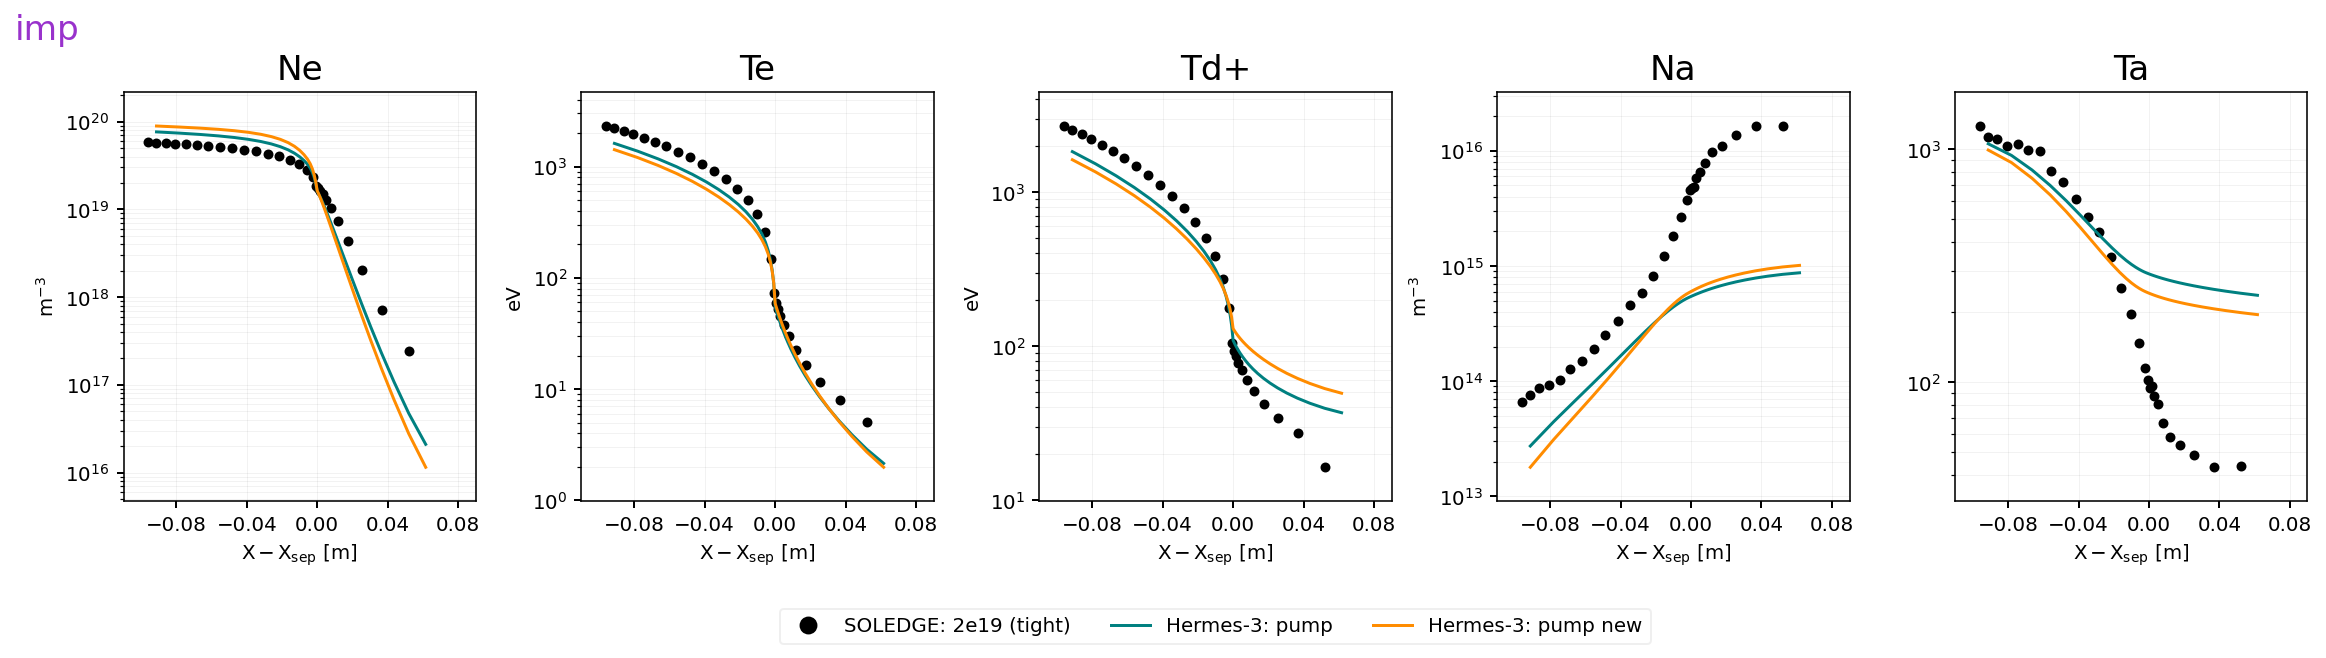

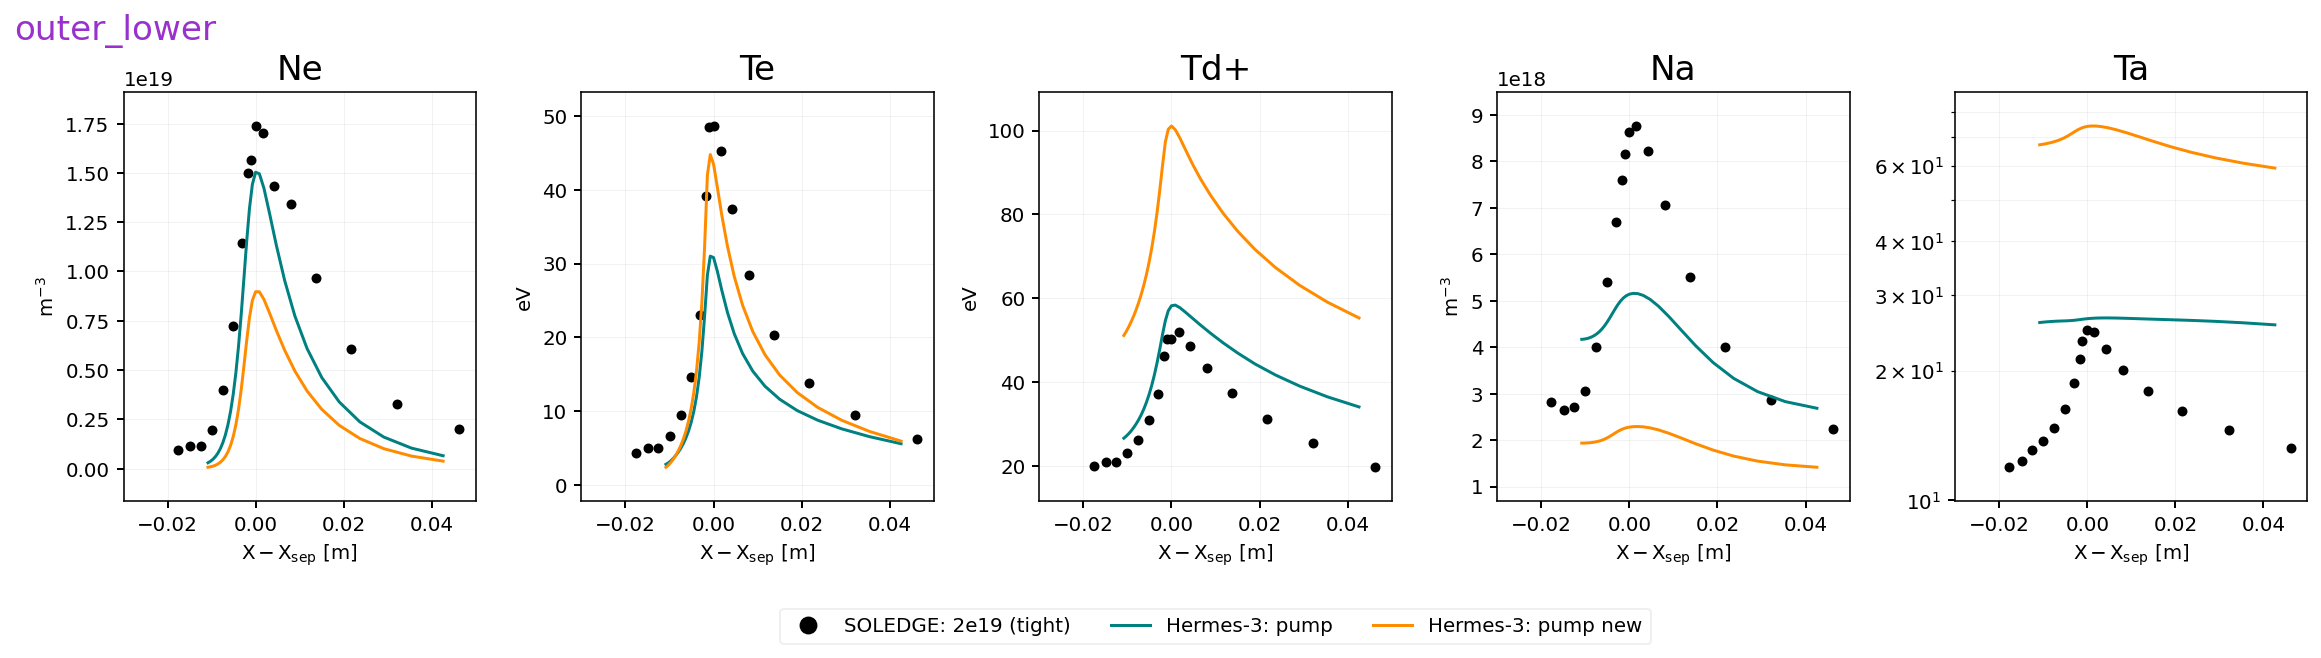

In [11]:

plt.close("all")
lineplot_compare(
    cases = { 


    "SOLEDGE: 2e19 (tight)" : dict(data=sl["tightwall_2e19"], color="black"),
    # "SOLPS: 2e19 (tight)" : dict(data=sp["nsep_3e19"], color="red"),
    
    # "Hermes-3: frec": dict(data=hr["frec"], color = "teal"),
    # "Hermes-3: frec new" : dict(data=hr['frec_new'], color = "darkorange"),
    "Hermes-3: pump" : dict(data=hr['pump'], color = "teal"),
    "Hermes-3: pump new" : dict(data=hr['pump_new'], color = "darkorange"),

    },
    regions = ["omp", "imp", "outer_lower"], 
    # regions = ["outer_lower"],
    # params = ["Ne", "Te"],
    params = ["Ne", "Te", "Td+", "Na", "Ta"],
    # params = ["Pe", "Pd+", "Pa"],
    mode = "log",
    dpi = 130,
    lw = 2
)

## Tune frec

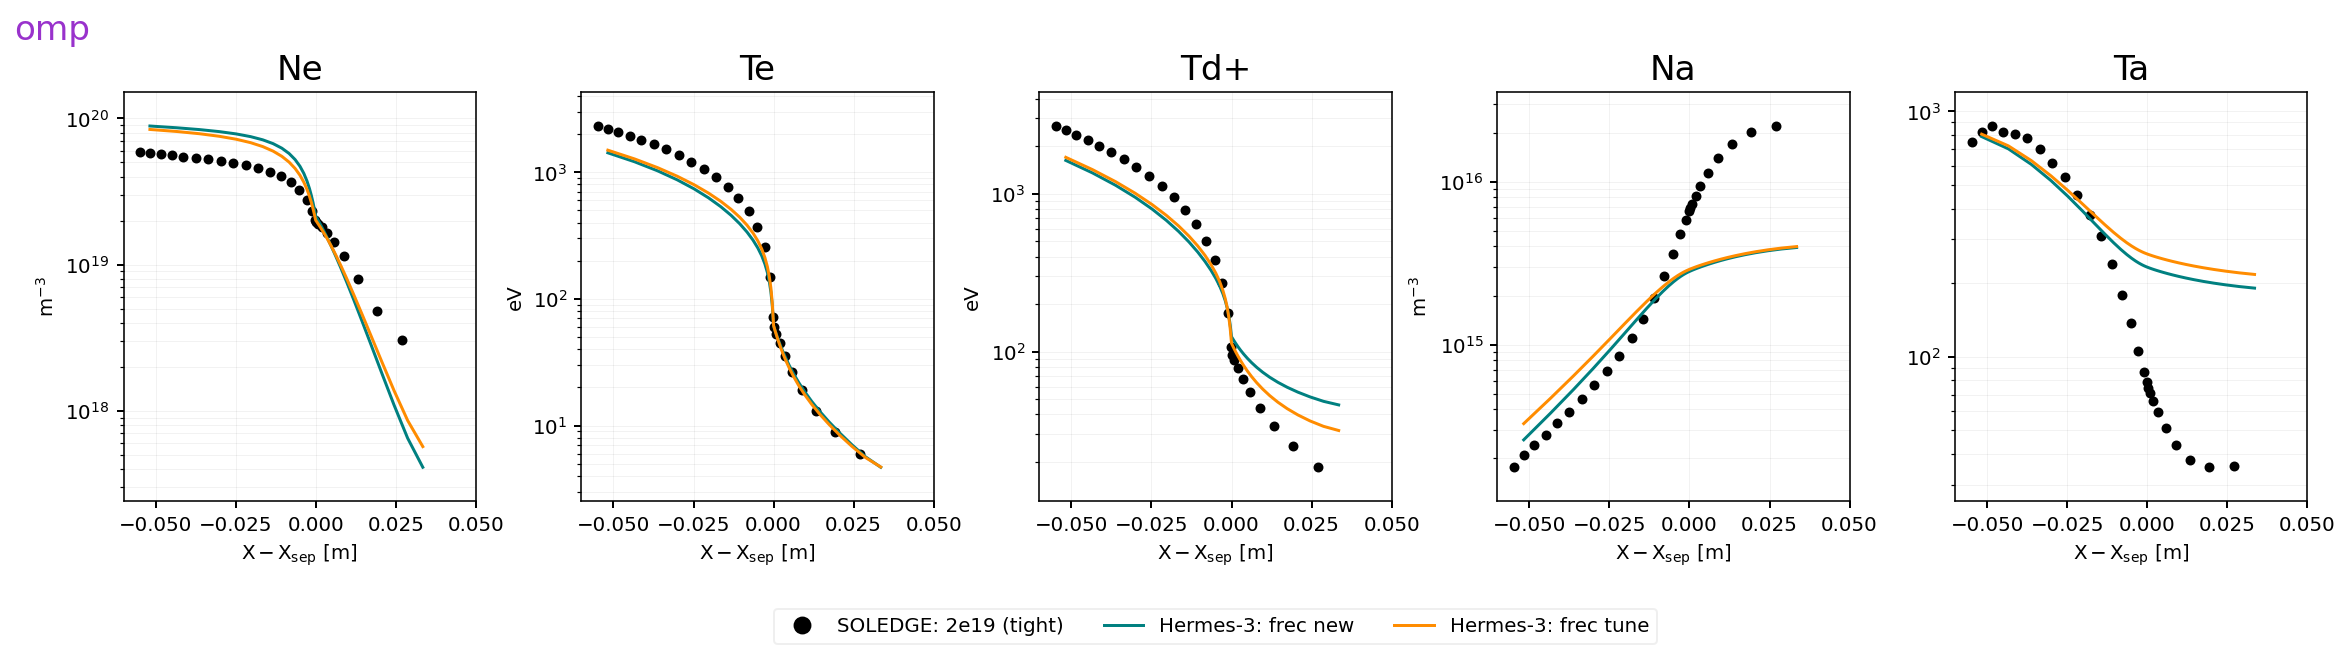

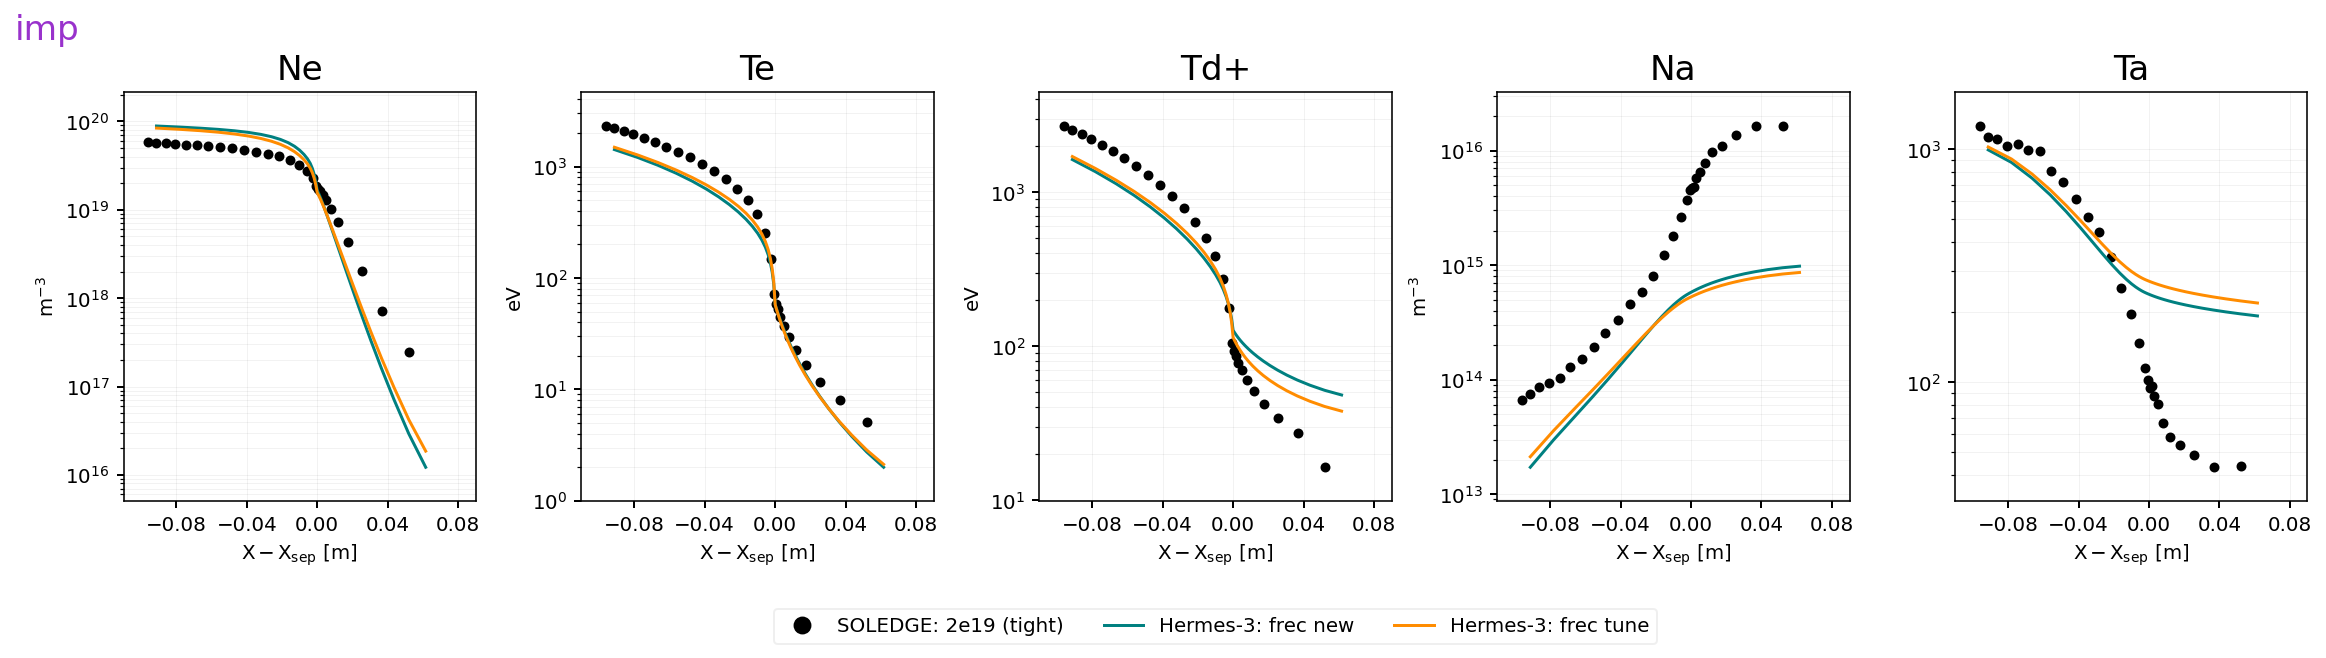

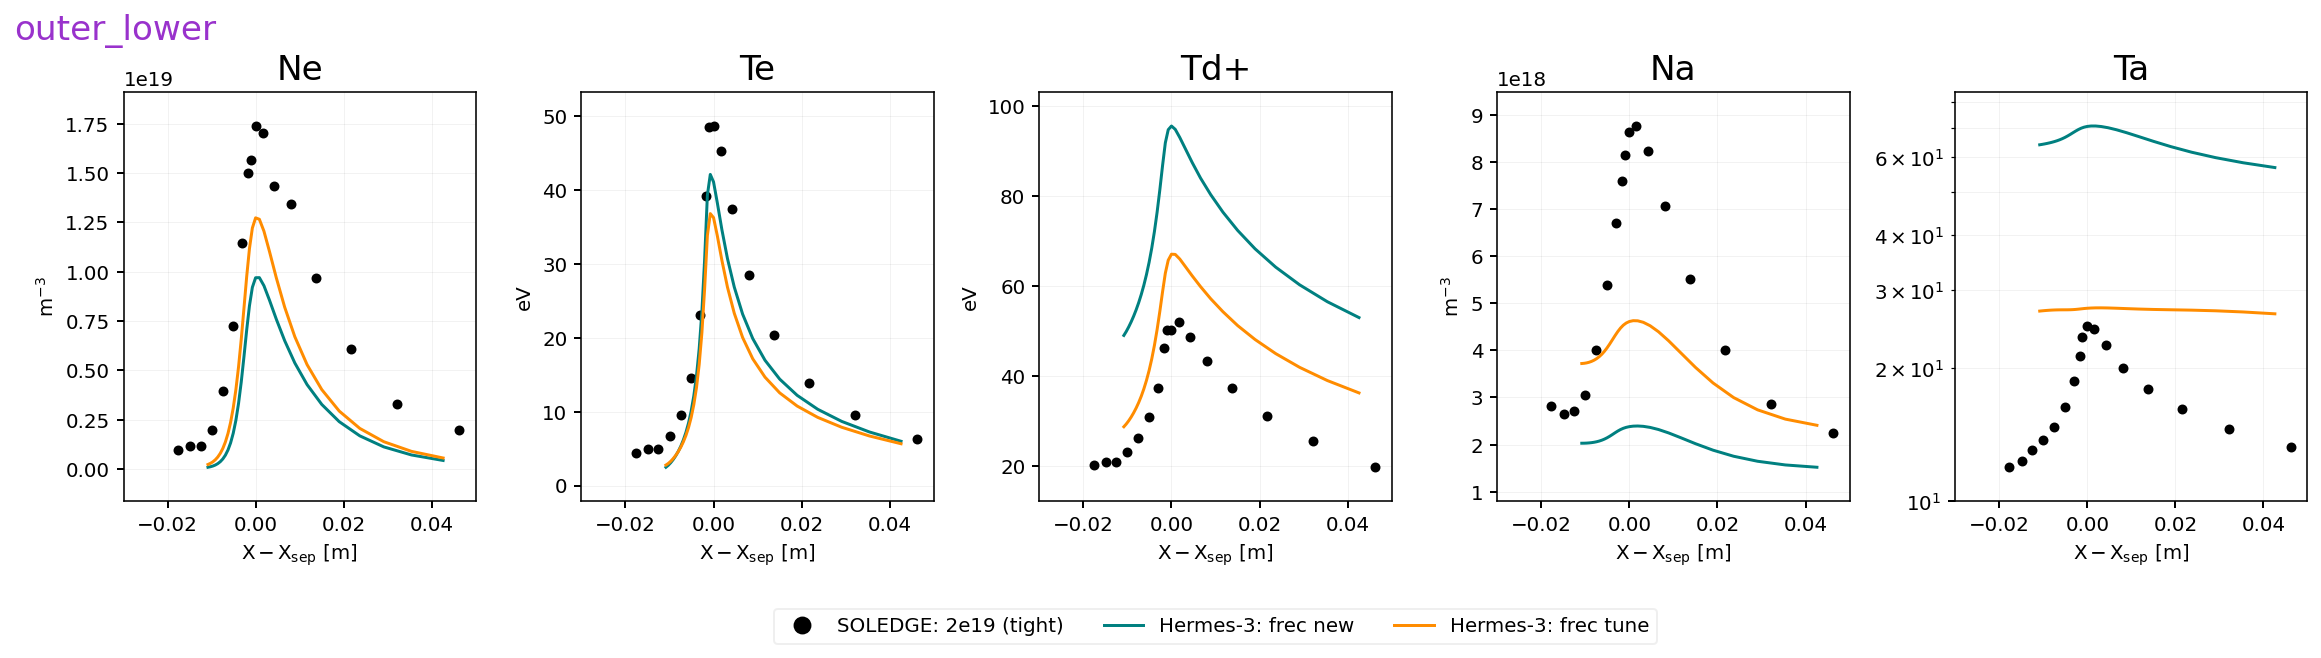

In [14]:

plt.close("all")
lineplot_compare(
    cases = { 


    "SOLEDGE: 2e19 (tight)" : dict(data=sl["tightwall_2e19"], color="black"),
    # "SOLPS: 2e19 (tight)" : dict(data=sp["nsep_3e19"], color="red"),
    
    # "Hermes-3: frec": dict(data=hr["frec"], color = "teal"),
    "Hermes-3: frec new" : dict(data=hr['frec_new'], color = "teal"),
    "Hermes-3: frec tune" : dict(data=hr['frec_tune'], color = "darkorange"),
    # "Hermes-3: frec tune crash" : dict(data=hr['frec_tune_crash'], color = "darkorange"),
    # "Hermes-3: pump" : dict(data=hr['pump'], color = "teal"),
    # "Hermes-3: pump new" : dict(data=hr['pump_new'], color = "darkorange"),

    },
    regions = ["omp", "imp", "outer_lower"], 
    # regions = ["outer_lower"],
    # params = ["Ne", "Te"],
    params = ["Ne", "Te", "Td+", "Na", "Ta"],
    # params = ["Pe", "Pd+", "Pa"],
    mode = "log",
    dpi = 130,
    lw = 2
)

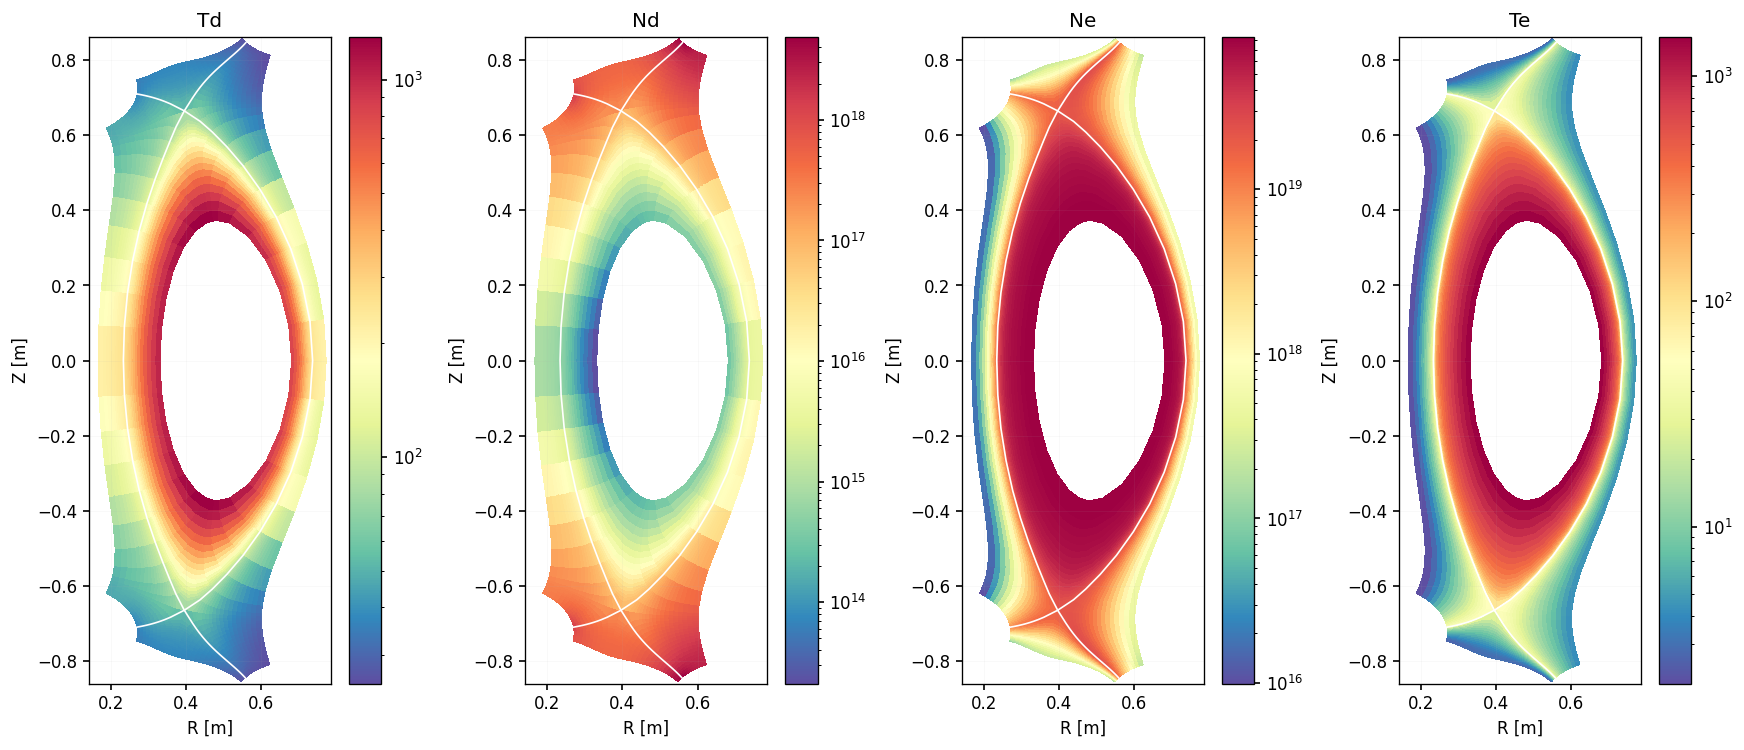

In [19]:
ds = casestore["frec_tune"].ds.isel(t=-2)
# omp = ds.hermesm.select_region("outer_midplane_a")

fig, axes = plt.subplots(1,4, figsize = (18,7))
ds["Td"].hermesm.clean_guards().bout.polygon(ax=axes[0], cmap = "Spectral_r", logscale = True)
ds["Nd"].hermesm.clean_guards().bout.polygon(ax=axes[1], cmap = "Spectral_r", logscale = True)
ds["Ne"].hermesm.clean_guards().bout.polygon(ax=axes[2], cmap = "Spectral_r", logscale = True)
ds["Te"].hermesm.clean_guards().bout.polygon(ax=axes[3], cmap = "Spectral_r", logscale = True)

c:\Users\mikek\OneDrive\Project\python-packages\soledge\routines\h5_routines.py:65: FutureWarning: In the future `np.str` will be defined as the corresponding NumPy scalar.
  Data = Data.astype(np.str)


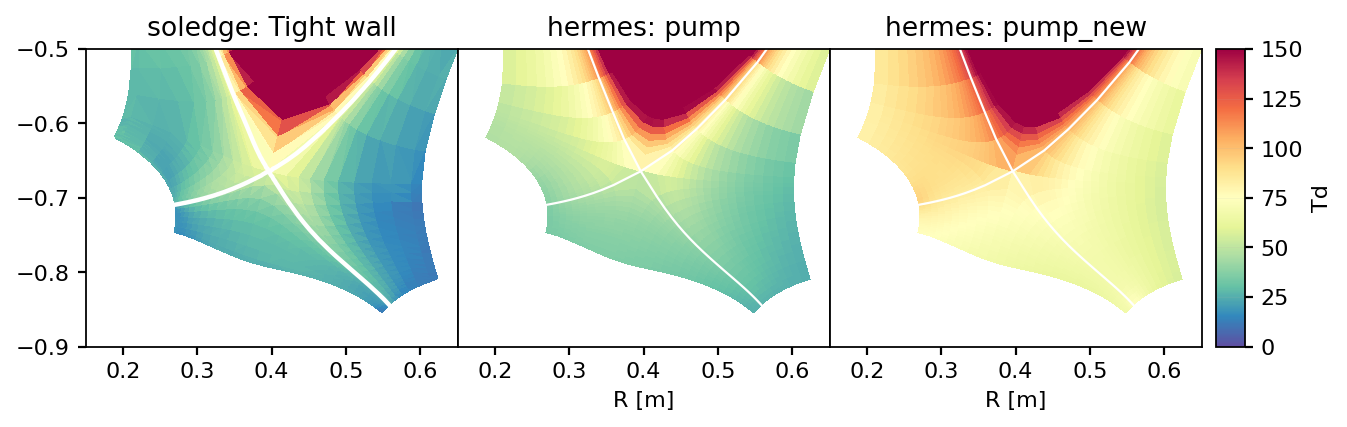

In [10]:
plt.close("all")
v = viewer_2d(
    "Td",
    [
        {"name" : "Tight wall", "code":"soledge", "path" : soledgecases["tightwall_2e19"]},
        # {"name" : "frec", "code" : "hermes", "ds" : casestore["frec"].ds.isel(t=-1)},
        # {"name" : "frec_new", "code" : "hermes", "ds" : casestore["frec_new"].ds.isel(t=-1)},
        
        {"name" : "pump", "code" : "hermes", "ds" : casestore["pump"].ds.isel(t=-1)},
        {"name" : "pump_new", "code" : "hermes", "ds" : casestore["pump_new"].ds.isel(t=-1)},
    ],
    logscale = False,
    vmin = 0,
    vmax = 150,
    # vmin = 1e17,
    # vmax = 1e19,
    dpi = 160,
    ylim = (-0.9,-0.5),
    xlim = (0.15, 0.65),
    wspace = 0.0,
    cmap = "Spectral_r",
    slider = False
)

# AFN (unch) enabled

In [27]:
hr.keys()

dict_keys(['pump', 'frec', 'pump_new', 'frec_new', 'afn_new', 'afn_new_cond0.1'])

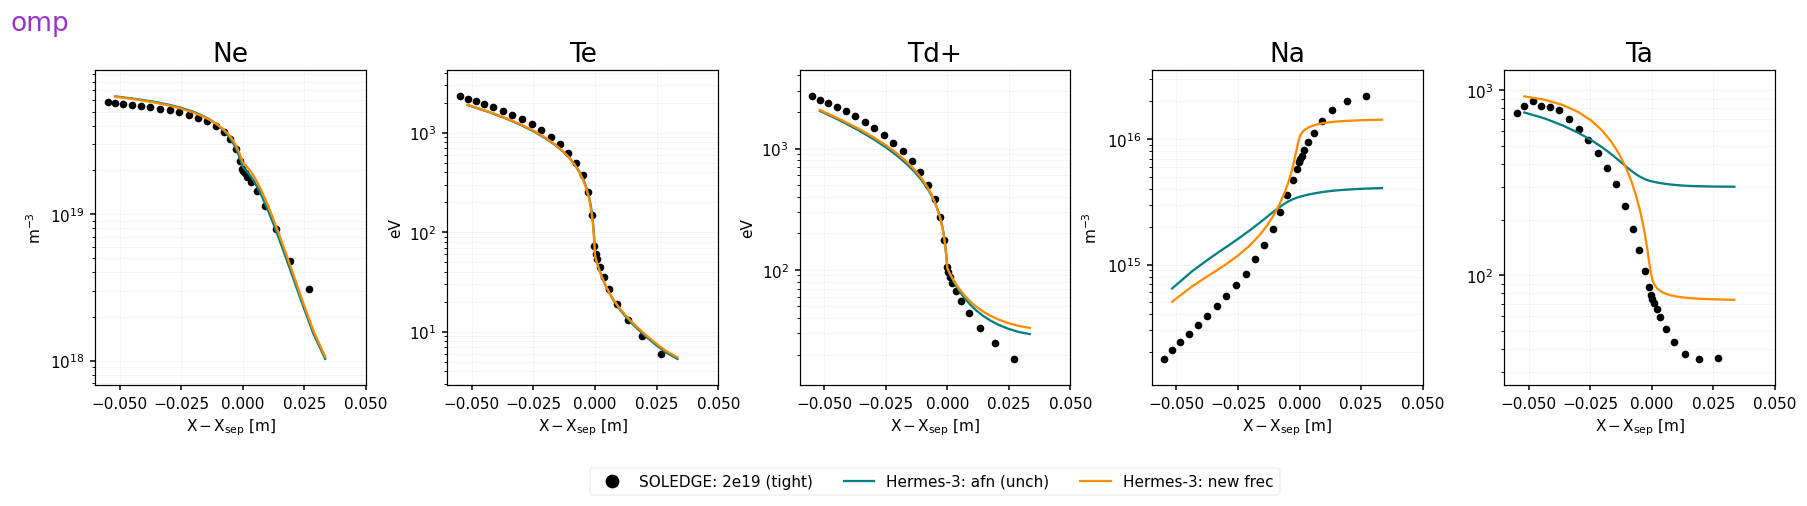

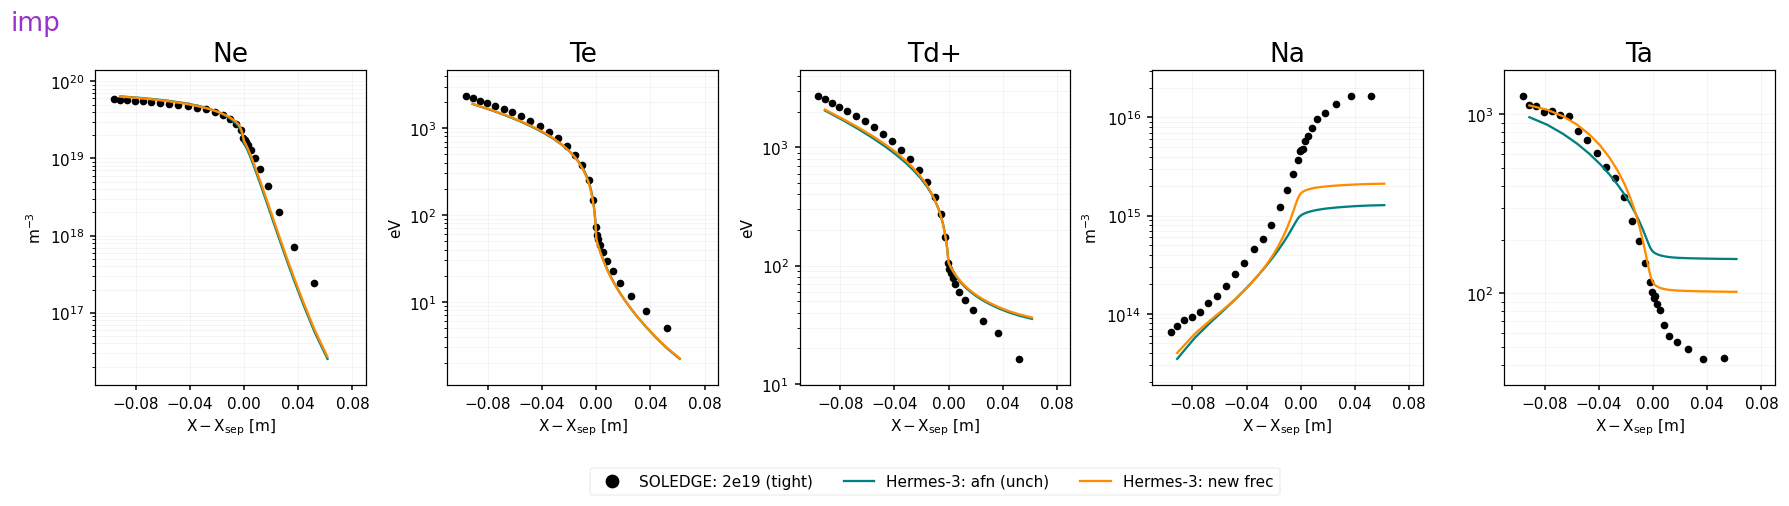

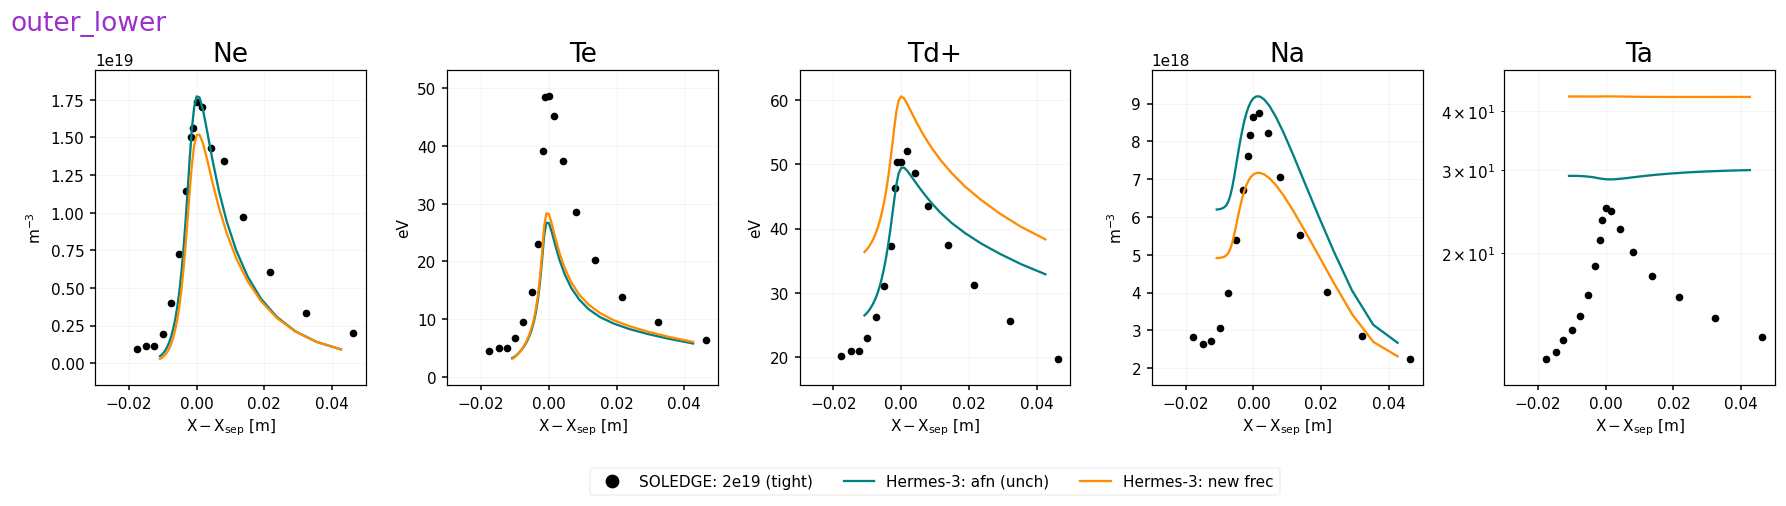

In [69]:
plt.close("all")
lineplot_compare(
    cases = { 
    "SOLEDGE: 2e19 (tight)" : dict(data=sl["tightwall_2e19"], color="black"),
    # "SOLPS: 2e19 (tight)" : dict(data=sp["nsep_3e19"], color="red"),
    
    # "Hermes-3: frec": dict(data=hr["frec"], color = "teal"),
    # "Hermes-3: frec new" : dict(data=hr['frec_new'], color = "darkorange"),
    "Hermes-3: afn (unch)" : dict(data=hr['afn_unch'], color = "teal"),
    "Hermes-3: new frec" : dict(data=hr['afn_new'], color = "darkorange"),
    # r"Hermes-3: cond $\alpha$ 0.1" : dict(data=hr['afn_new_cond0.1'], color = "limegreen"),

    },
    regions = ["omp", "imp", "outer_lower"], 
    # regions = ["outer_lower"],
    # params = ["Ne", "Te"],
    params = ["Ne", "Te", "Td+", "Na", "Ta"],
    # params = ["Pe", "Pd+", "Pa"],
    mode = "log",
    dpi = 100,
    lw = 2
)

c:\Users\mikek\OneDrive\Project\python-packages\soledge\routines\h5_routines.py:65: FutureWarning: In the future `np.str` will be defined as the corresponding NumPy scalar.
  Data = Data.astype(np.str)


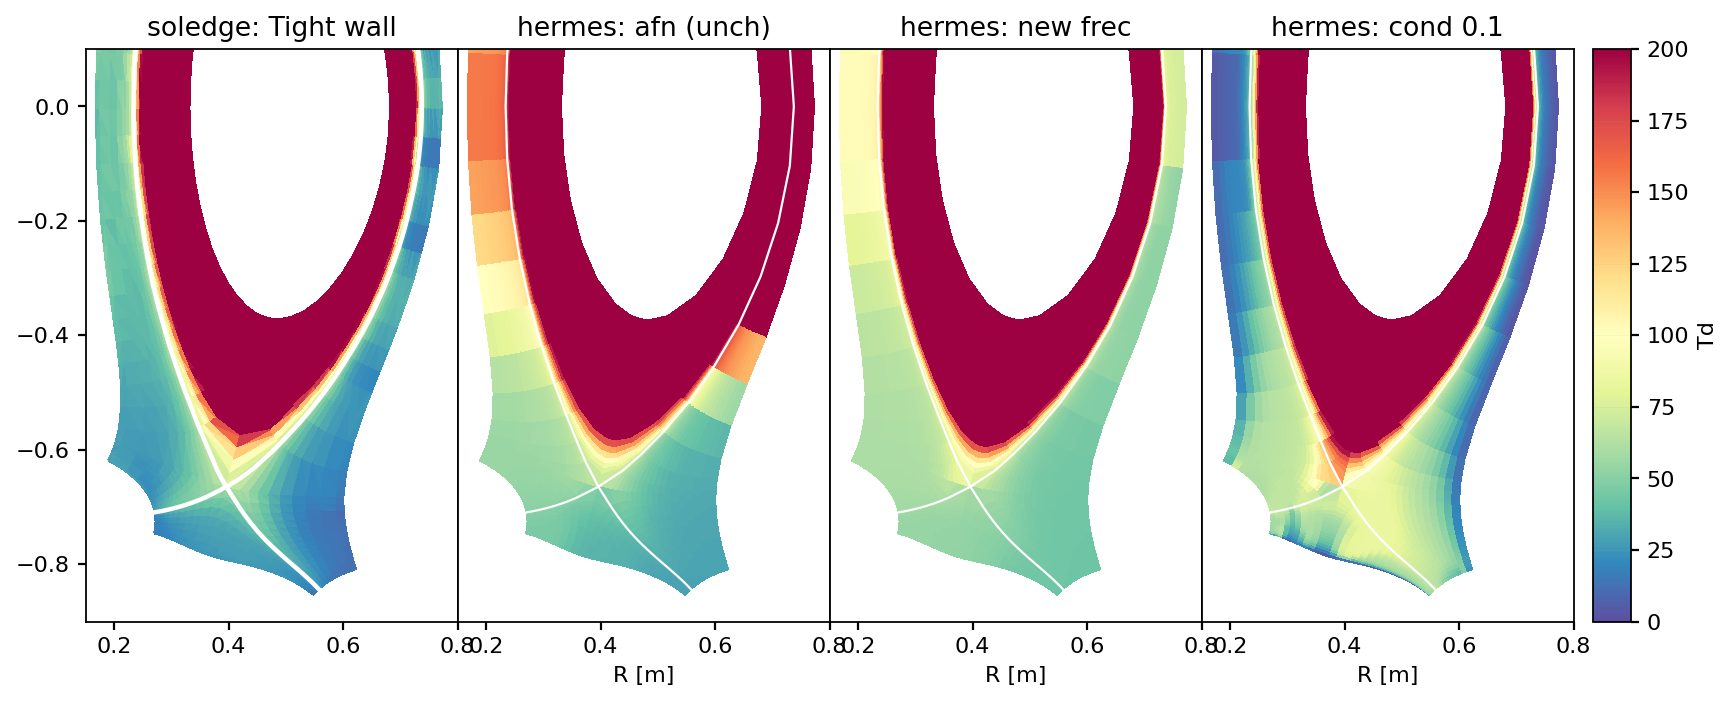

In [55]:
plt.close("all")
v = viewer_2d(
    "Td",
    [
        {"name" : "Tight wall", "code":"soledge", "path" : soledgecases["tightwall_2e19"]},
        # {"name" : "frec", "code" : "hermes", "ds" : casestore["frec"].ds.isel(t=-1)},
        # {"name" : "frec_new", "code" : "hermes", "ds" : casestore["frec_new"].ds.isel(t=-1)},
        
        {"name" : "afn (unch)", "code" : "hermes", "ds" : casestore["afn_unch"].ds.isel(t=-1)},
        {"name" : "new frec", "code" : "hermes", "ds" : casestore["afn_new"].ds.isel(t=-1)},
        {"name" : "cond 0.1", "code" : "hermes", "ds" : casestore['afn_new_cond0.1'].ds.isel(t=-1)},
    ],
    logscale = False,
    vmin = 0,
    vmax = 200,
    # vmin = 1e17,
    # vmax = 1e19,
    dpi = 160,
    ylim = (-0.9,0.1),
    xlim = (0.15, 0.8),
    wspace = 0.0,
    cmap = "Spectral_r",
    slider = False
)

In [63]:
hr.keys()

dict_keys(['pump', 'frec', 'pump_new', 'frec_new', 'afn_unch', 'afn_new', 'afn_new_cond0.1'])

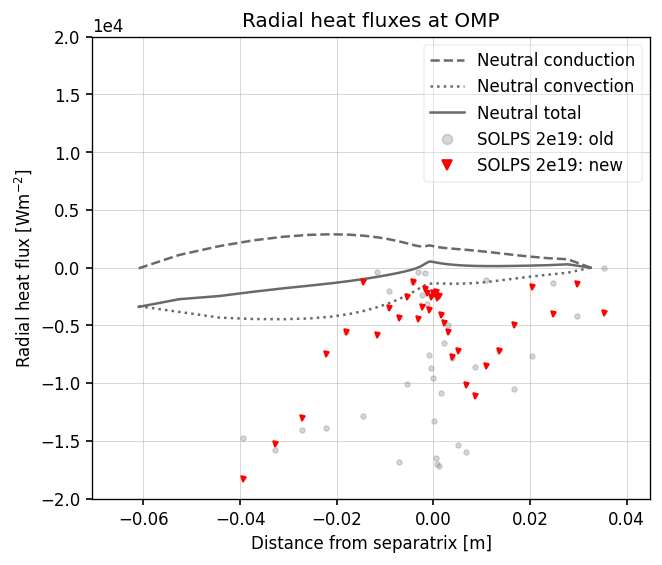

In [68]:
fig, ax = plt.subplots()
plot_perp_heat_fluxes(casestore['afn_new'].ds.isel(t=-1), ax = ax, loc = "omp", ylim=(-2e4, 2e4), neutrals_only = True)

ax.plot(sp["nsep_2e19"].regions["omp"].index, sp["nsep_2e19"].regions["omp"]["refluxa3da"]*-1, label = "SOLPS 2e19: old", color = "grey", lw=0, marker = "o", ms = 3, alpha = 0.3)
ax.plot(sp["16x_mc"].regions["omp"].index, sp["16x_mc"].regions["omp"]["refluxa3da"]*-1, label = "SOLPS 2e19: new", color = "red", lw=0, marker = "v", ms = 3)

ax.legend()
ax.grid(alpha = 1)

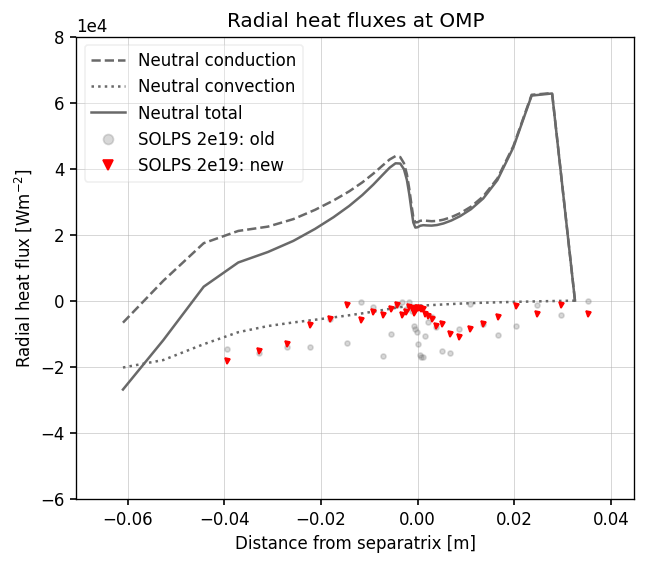

In [59]:
fig, ax = plt.subplots()
plot_perp_heat_fluxes(casestore['afn_new_cond0.1'].ds.isel(t=-1), ax = ax, loc = "omp", ylim=(-6e4, 8e4), neutrals_only = True)

ax.plot(sp["nsep_2e19"].regions["omp"].index, sp["nsep_2e19"].regions["omp"]["refluxa3da"]*-1, label = "SOLPS 2e19: old", color = "grey", lw=0, marker = "o", ms = 3, alpha = 0.3)
ax.plot(sp["16x_mc"].regions["omp"].index, sp["16x_mc"].regions["omp"]["refluxa3da"]*-1, label = "SOLPS 2e19: new", color = "red", lw=0, marker = "v", ms = 3)

ax.legend()
ax.grid(alpha = 1)

In [48]:
calculate_simple_heat_balance(casestore["afn_new"].ds.isel(t=-1))

Wall reflective cooling:
inner_wall  : -0.012 [MW]
outer_wall  : -0.153 [MW]
pfr         : -0.145 [MW]
targets     : -0.061 [MW]
Total       : -0.371 [MW]

Recycling neutral energy source:
Total       : 0.618 [MW]


In [46]:
ds = casestore["afn_new"].ds.isel(t=-1)
m = ds.metadata

In [57]:
"""
Simple heat balance with things hardcoded
Currently only reflective wall cooling
"""
if ds["t"].shape != ():
    raise Exception("Please supply a single time slice")
places = {}

places["inner_wall  "] = ds.hermesm.select_region("inner_sol_edge")
places["outer_wall  "] = ds.hermesm.select_region("outer_sol_edge")
places["pfr         "] = ds.hermesm.select_region("pfr_edge")

if "Ed_wall_refl" in ds.data_vars:
    hflows = {}
    for place in places:
        ds_place = places[place]
        hflows[place] = ()
        hflows[place] = (ds_place["Ed_wall_refl"] * ds_place["dv"] ).sum().values * 1e-6
        
    hflows["targets     "] = (ds["Ed_target_refl"] * ds["dv"]).sum().values * 1e-6
    
    print("Wall reflective cooling:")
    tot = 0
    for name in hflows:
        print(f"{name}            : {hflows[name]:.3f} [MW]")
        tot += hflows[name]
        
    print(f"Total                   : {tot:.3f} [MW]\n")
else:
    print("No wall heat fluxes found in dataset")
    
print("Recycling neutral energy source:")
en_rec = (ds["Ed_target_recycle"] * ds["dv"]).sum(["x", "theta"]).values * 1e-6
print(f"Total                   : {en_rec:.3f} [MW]")

print(f"\nBC heat fluxes:")
sheath_i = 0
sheath_e = 0
for target in m["targets"]:
    sheath_i += ds[f"hf_{target}_target_d+"].sum().values * 1e-6
    sheath_e += ds[f"hf_{target}_target_e"].sum().values * 1e-6
    
print(f"Target sheath ion flux  : {sheath_i:.3f} [MW]")
print(f"Target sheath ele flux  : {sheath_e:.3f} [MW]")

Wall reflective cooling:
inner_wall              : -0.012 [MW]
outer_wall              : -0.153 [MW]
pfr                     : -0.145 [MW]
targets                 : -0.061 [MW]
Total                   : -0.371 [MW]

Recycling neutral energy source:
Total                   : 0.618 [MW]

BC heat fluxes:
Target sheath ion flux  : -1.092 [MW]
Target sheath ele flux  : -0.622 [MW]


In [58]:
0.7*0.8

0.5599999999999999

In [47]:
hf_target = 0
for target in m["targets"]:
    hf_target += ds[f"hf_{target}_target_d+"].sum().values * 1e-6
    
hf_target

-1.0916816241749911

In [39]:
for name in casestore:
    casestore[name].ds = calculate_radial_fluxes(casestore[name].ds)
    casestore[name].ds = calculate_target_fluxes(casestore[name].ds)

Calculating target recycling:
inner_lower
outer_lower
inner_upper
outer_upper
Calculating target recycling:
inner_lower
outer_lower
inner_upper
outer_upper
Calculating target recycling:
inner_lower
outer_lower
inner_upper
outer_upper
Calculating target recycling:
inner_lower
outer_lower
inner_upper
outer_upper
Calculating target recycling:
inner_lower
outer_lower
inner_upper
outer_upper
Calculating target recycling:
inner_lower
outer_lower
inner_upper
outer_upper
Calculating target recycling:
inner_lower
outer_lower
inner_upper
outer_upper


# SOLPS

In [5]:
sp["nsep_2e19"].regions["omp"].columns

Index(['an3da', 'dn3da', 'dp3da', 'ke3da', 'ki3da', 'mn3da', 'ne3da', 'po3da',
       'te3da', 'ti3da', 'vs3da', 'vx3da', 'vy3da', 'vol3da', 'tie3da',
       'dab23da', 'tab23da', 'dmb23da', 'tmb23da', 'dib23da', 'tib23da',
       'rfluxa3da', 'rfluxm3da', 'pfluxa3da', 'pfluxm3da', 'refluxa3da',
       'refluxm3da', 'pefluxa3da', 'pefluxm3da', 'emiss3da', 'emissmol3da',
       'srcml3da', 'edissml3da', 'pab23da', 'pmb23da', 'pib23da', 'dnb23da',
       'pnb23da', 'tnb23da', 'emisstot3da', 'daeb23da', 'dmeb23da', 'dneb23da',
       'danb23da', 'taib23da', 'tmib23da', 'tnib23da', 'vrab23da', 'vpab23da',
       'vtab23da', 'vrmb23da', 'vpmb23da', 'vtmb23da', 'e0ab23da', 'e0mb23da',
       'eneutrad3da', 'emolrad3da', 'eionrad3da', 'etotrad3da', 'totrad3da',
       'Zeff3da', 'AMJUEL_H.4_2.1.5_3da', 'AMJUEL_H.10_2.1.5_3da',
       'AMJUEL_H.2_3.1.8FJ_3da', 'HYDHEL_H.2_2.2.9_3da',
       'HYDHEL_H.2_2.2.5_3da', 'HYDHEL_H.2_2.2.10_3da', 'AMJUEL_H.0_0.3T_3da',
       'AMJUEL_H.1_0.3T_3da', 'A

In [23]:
bal = nc.Dataset(os.path.join(solpscases["nsep_2e19"], "balance.nc"))

In [24]:
var = bal["pefluxa"][:]

b2fgmtry loaded from .pkl


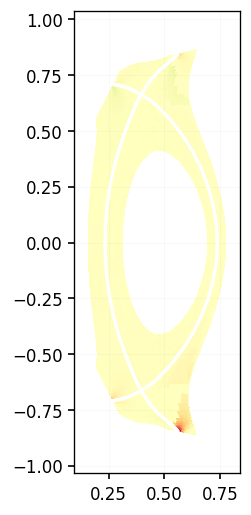

In [30]:
p = SOLPSplot(path = solpscases["nsep_2e19"], data = var)

fig, ax = plt.subplots()
p.plot(ax = ax, vmin = -3e6, vmax = 3e6, cmap = "RdBu_r")

In [14]:
p.variables

NameError: name 'p' is not defined

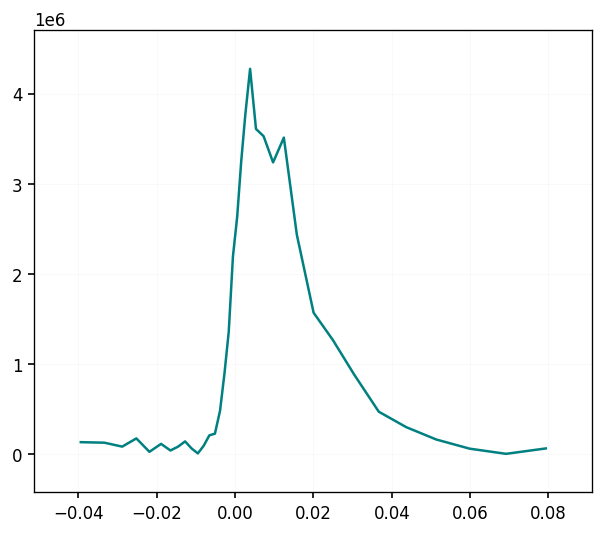

In [10]:
df = sp["nsep_2e19"].regions["outer_lower"]

fig, ax = plt.subplots()

ax.plot(df.index, df["refluxa3dr"])